#### xml 파일 읽기 실습

468 92 640 340 dog
3 183 204 397 cat


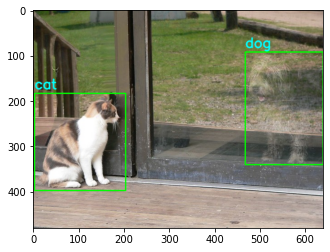

In [44]:
import os 
import cv2
import matplotlib.pylab as plt
from xml.etree.ElementTree import parse

def xml_read(xml_path) :
    
    root = parse(xml_path).getroot()
    
    image_info = root.findall("image")
    
    for image in image_info :
        bbox = image.findall('box')
        # <image id="0" name="01.jpg" width="640" height="480">
        
        # image width height 
        image_width = image.attrib['width']
        image_heigth = image.attrib['height']
        
        # image name and path 
        image_name = image.attrib['name']
        image_name = os.path.join("./xml_image/", image_name)
        
        # image read 
        image = cv2.imread(image_name)
        # image BGR -> RGB 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox :
            label = box_info.attrib['label']
            
            # 값 -> string 타입 
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            # 소수점이 포함이라 바로 int 값 변환 불가 하여 float 변환 
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
            
            # float -> int 변환 
            xtl_i = int(xtl_f)
            ytl_i = int(ytl_f)
            xbr_i = int(xbr_f)
            ybr_i = int(ybr_f)
            
            print(xtl_i, ytl_i, xbr_i, ybr_i, label)
            ### xtl="468.94" ytl="92.01" xbr="640.00" ybr="340.46"
            
            ### 이미지 시각화 
            image = cv2.rectangle(image, (xtl_i, ytl_i), (xbr_i, ybr_i), (0,255,0), 2)
            
            ### 라벨 추가 
            image = cv2.putText(image, label, (xtl_i, ytl_i-10), 
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
         
        plt.imshow(image)
        plt.show()
    
xml_read("./xml_annotation/annotations.xml")

#### xml to yolo format 변경하기 실습 

In [16]:
import os 
import cv2
import matplotlib.pylab as plt
from xml.etree.ElementTree import parse

label_number_dict = {'cat':0, 'dog':1}

def xml_read(xml_path) :
    
    root = parse(xml_path).getroot()
    
    image_info = root.findall("image")
    
    for image in image_info :
        bbox = image.findall('box')
        # <image id="0" name="01.jpg" width="640" height="480">
        
        # image width height 
        image_width = image.attrib['width']
        image_heigth = image.attrib['height']
        
        # image name and path 
        image_name = image.attrib['name']
        image_name_temp = image_name
        image_name = os.path.join("./xml_image/", image_name)
        
        # image read 
        image = cv2.imread(image_name)
        # image BGR -> RGB 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox :
            label = box_info.attrib['label']
            
            # 값 -> string 타입 
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            # 소수점이 포함이라 바로 int 값 변환 불가 하여 float 변환 
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
            
            # float -> int 변환 
            x1_i = int(xtl_f)
            y1_i = int(ytl_f)
            x2_i = int(xbr_f)
            y2_i = int(ybr_f)
            
            ### xtl="468.94" ytl="92.01" xbr="640.00" ybr="340.46"
            
            # 이미지 사이즈가 필요 위에 있는 image_width, image_heigth 경우는 string 타입 형변환 필요 int 
            img_width_i = int(image_width)
            img_height_i = int(image_heigth)
            
            # Pascal_xyxy to YOlO center_x center_y yolo_w yolo_h 
            
            center_x = ((x2_i + x1_i)/(2*img_width_i))
            center_y = ((y2_i + y1_i)/(2*img_height_i))
            yolo_w = (x2_i - x1_i)/img_width_i
            yolo_h = (y2_i - y1_i)/img_height_i
                                    
            # file_name 
            image_name_temp = image_name_temp.replace('.jpg', '')
            
            # label cat, dog -> 0, 1 로 변경하기 
            label_number = label_number_dict[label]
            
            print("Pascal_xyxy to YOLO >> ", label_number,center_x, center_y, yolo_w, yolo_h)
    
            # 텍스트로 저장하기 
            with open(f"{image_name_temp}.txt", "a") as f:
                f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")
    
xml_read("./xml_annotation/annotations.xml")

Pascal_xyxy to YOLO >>  1 0.865625 0.45 0.26875 0.5166666666666667
Pascal_xyxy to YOLO >>  0 0.16171875 0.6041666666666666 0.3140625 0.44583333333333336
